## Summary notes

How to perform a one-sample and two-sample $z-$tests of population means, and a $z-$test of a population proportion using *scipy* and *statsmodels*.

These topics were covered in M248, Units 8 and 9.

In [1]:
import pandas as pd
from scipy import stats as st
from statsmodels.stats import weightstats as ws
from statsmodels.stats import proportion as prop
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%load_ext watermark
%watermark -iv

seaborn    : 0.12.1
statsmodels: 0.13.2
matplotlib : 3.6.1
scipy      : 1.9.3
pandas     : 1.5.1



In [3]:
%precision 4
sns.set_theme()

## Test of population means

Data on the mean pass rate across all UK test centres during the period from April 2014 to March 2015 was obtained and analysed using an approximate normal model.
(Data were taken from the Open University, who did not provide the primary source.)

Load the data.

In [4]:
pass_rates = pd.read_csv('https://raw.githubusercontent.com/ljk233/laughingrook-datasets/main/m248/pass_rates.csv')  # noqa
pass_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   centre  316 non-null    object 
 1   female  316 non-null    float64
 2   male    316 non-null    float64
 3   total   316 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.0+ KB


### One-sample $z-$test

In the year 2013/14, the mean pass rate for all learner drivers was 47.1%.
Was the mean total pass rate in 2014/15 equal to that in 2013/14?

This is a test of the hypotheses,

$$
H_{0}: \mu_{2014} = 47.1\%; \hspace{2mm} H_{1}: \mu_{2014} \ne 47.1\%.
$$

Inititialise an instance of `DescrStatsW`.

In [5]:
d = ws.DescrStatsW(pass_rates['total'])

Return a 95% interval estimate of the mean total pass rate.

In [6]:
# lcb, ucb
d.zconfint_mean()

(48.8403, 50.4204)

Check the normality of the data using a **normal probability plot**.

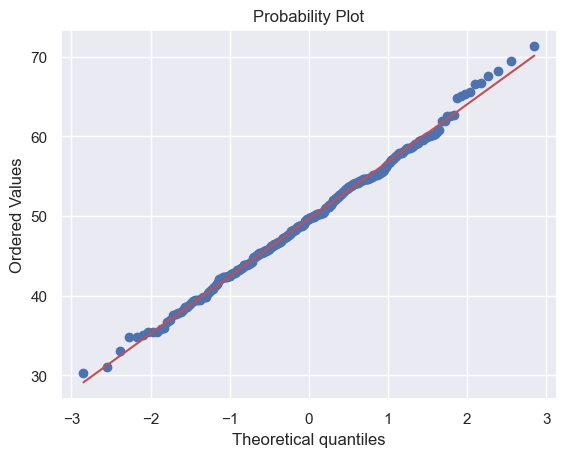

In [7]:
f, ax = plt.subplots()
r = st.probplot(x=d.data, plot=ax)

Perform a one-sample $z$-test.

In [8]:
# zstat, pval
d.ztest_mean(value=47.1)

(6.2775, 0.0000)

### Two-sample $z-$test

Was the mean pass rate of females equal to that of males?

This is a test of the hypotheses,

$$
H_{0}: \mu_{f} = \mu_{m};
\hspace{3mm} H_{1}: \mu_{f} \ne \mu_{m}.
$$

Initialise two instances of `DescrStatsW`, one for each sample, and an instance of `CompareMeans`.

In [9]:
df = ws.DescrStatsW(pass_rates['female'])
dm = ws.DescrStatsW(pass_rates['male'])
cm = ws.CompareMeans(df, dm)

Return an interval estimate of the difference between the two pass rates.

In [10]:
# lcb, ucb
cm.zconfint_diff()

(-8.2503, -5.9294)

Check the normality of both data.

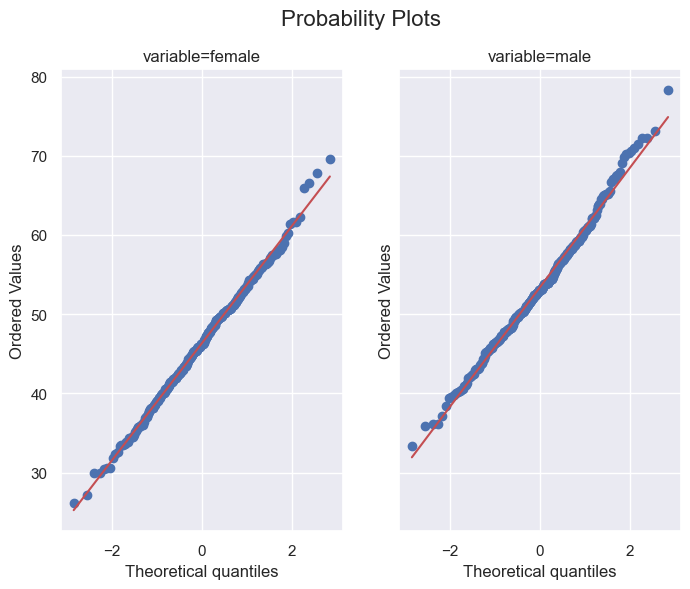

In [11]:
f, axs = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
f.suptitle('Probability Plots', fontsize=16)
# plot sample 1
st.probplot(x=df.data, plot=axs[0])
axs[0].set_title('variable=female')
# plot sample 2
st.probplot(x=dm.data, plot=axs[1])
axs[1].set_title('variable=male')
# plot the graphs
plt.show()

Perform a two-sample $z$-test.

In [12]:
# zstat, pval
cm.ztest_ind()

(-11.9746, 0.0000)

## Test of a proportion

> *Newborn babies are more likely to be male than female.*
*A random sample found 13,173 males were born among 25,468 newborn children.*
>
> *Is this sample evidence that the birth of males is more common than the birth of females in the entire population?*
>
> [Test of Proportion](https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/proportions) (Statistics Online, Pennsylvania State University)

This is a test of the hypothesis,

$$
H_{0}: p_{m} = 0.5; \hspace{3mm} p_{m} > 0.5,
$$

where $p_{m}$ is the proportion of male births.

Declare and initialise `x`, `n`, where `x` is the number of male births and `n` is the sample size.

In [13]:
x, n = 13_173, 25_468
x/n

0.5172

Return a 95% interval estimate of the proportion of male births.

In [14]:
# lcb, ucb
prop.proportion_confint(x, n)

(0.5111, 0.5234)

Perform a one-sided *z*-test of a proportion.

In [15]:
# zstat, pval
prop.proportions_ztest(x, n, value=0.5, alternative='larger')

(5.5050, 0.0000)